# Task 1: Perform an Exploratory Data Analysis on a Given Dataset (5 marks)

## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd

data = pd.read_csv('data/03_transaction_records.csv')

In [2]:
data.head()

,FISCAL_YR,FISCAL_MTH,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESC,TRANS_DT,AMT
0,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,DOUBLETREE HOTELS WASHING,LODGING,6/3/2016,-5.50
1,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,18.31
2,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,21.61
3,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,22.39
4,2017,1,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,HYATT REGENCY NW ORLE F/B,EATING PLACES RESTAURANTS,6/26/2016,5.44


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15156 entries, 0 to 15155
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FISCAL_YR   15156 non-null  int64  
 1   FISCAL_MTH  15156 non-null  int64  
 2   DEPT_NAME   15156 non-null  object 
 3   DIV_NAME    15156 non-null  object 
 4   MERCHANT    15156 non-null  object 
 5   CAT_DESC    15156 non-null  object 
 6   TRANS_DT    15156 non-null  object 
 7   AMT         15156 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 947.4+ KB


In [4]:
data.isnull().sum()

FISCAL_YR     0
FISCAL_MTH    0
DEPT_NAME     0
DIV_NAME      0
MERCHANT      0
CAT_DESC      0
TRANS_DT      0
AMT           0
dtype: int64

In [5]:
data.describe()

,FISCAL_YR,FISCAL_MTH,AMT
count,15156.000000,15156.000000,15156.000000
mean,2019.156374,6.293019,315.448271
std,1.661039,3.542863,1530.714012
min,2017.000000,1.000000,-12849.300000
25%,2018.000000,3.000000,16.090000
50%,2019.000000,6.000000,48.990000
75%,2021.000000,10.000000,264.162500
max,2022.000000,12.000000,88501.320000


In [6]:
data.describe(include=['object'])

,DEPT_NAME,DIV_NAME,MERCHANT,CAT_DESC,TRANS_DT
count,15156,15156,15156,15156,15156
unique,1,25,5802,208,1851
top,DEPT OF EDUCATION,DEPARTMENT OF EDUCATION,WB MASON,Eating Places Restaurants,5/1/2019
freq,15156,4675,293,1544,85


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


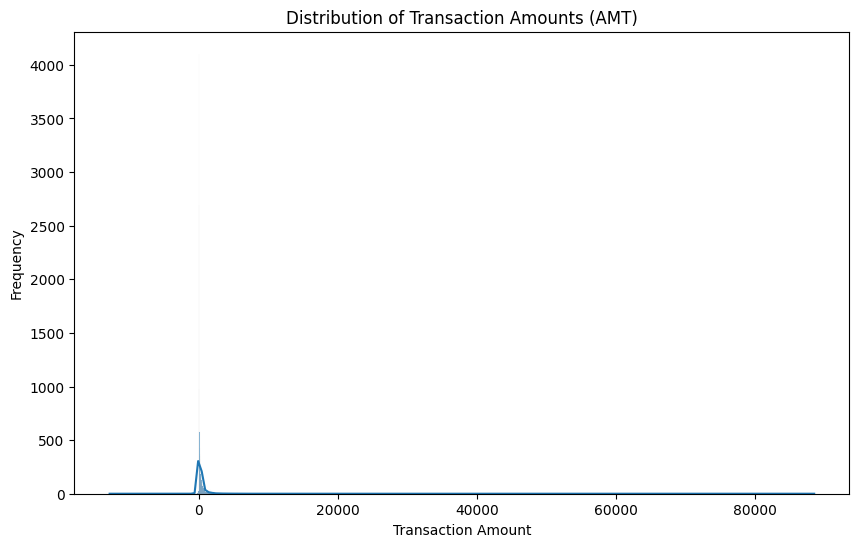

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'AMT' (Amount)
plt.figure(figsize=(10, 6))
sns.histplot(data['AMT'], kde=True)
plt.title('Distribution of Transaction Amounts (AMT)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

The transaction amount has a large range with a lot of it being around 0, which explains why the histogram looks like this.

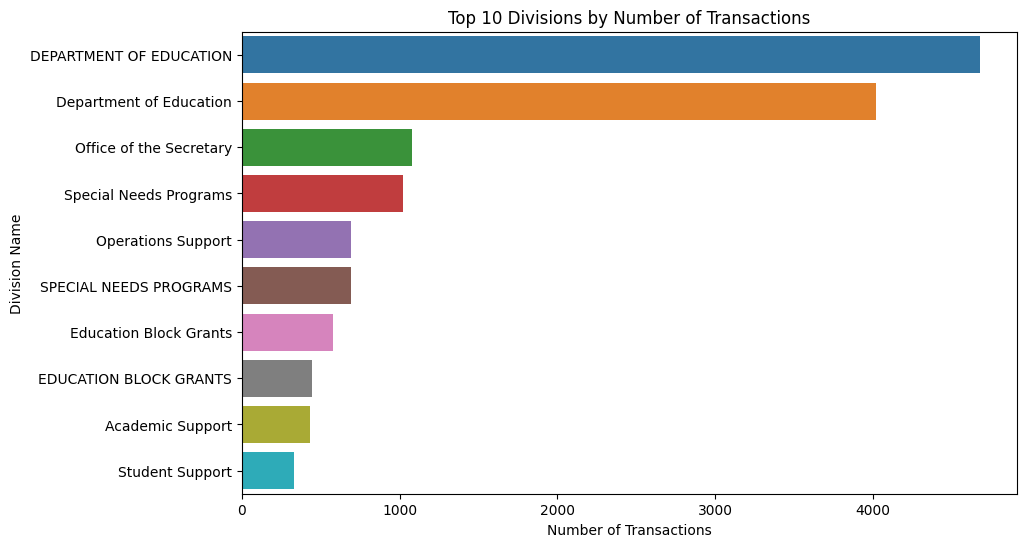

In [8]:
# Count plot for 'DIV_NAME' (Top 10)
plt.figure(figsize=(10, 6))
sns.countplot(y=data['DIV_NAME'], order=data['DIV_NAME'].value_counts().iloc[:10].index)
plt.title('Top 10 Divisions by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Division Name')
plt.show()

We can see that the top 2 are the same but with different spelling, so that needs to be cleaned later on.

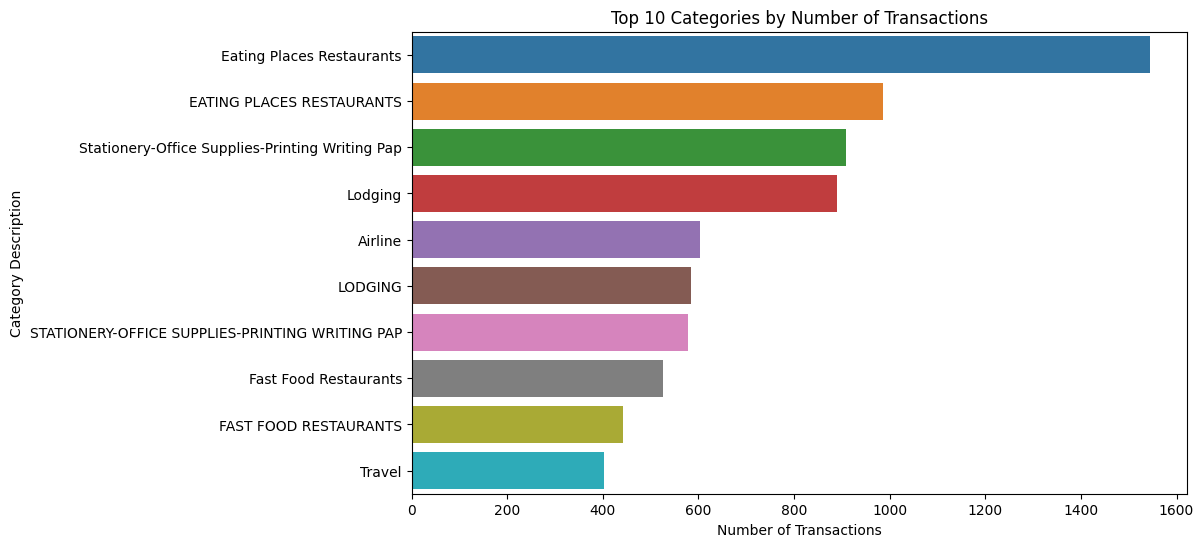

In [9]:
# Count plot for 'CAT_DESC' (Top 10)
plt.figure(figsize=(10, 6))
sns.countplot(y=data['CAT_DESC'], order=data['CAT_DESC'].value_counts().iloc[:10].index)
plt.title('Top 10 Categories by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Category Description')
plt.show()

Similarly for this, cleaning has to be done.

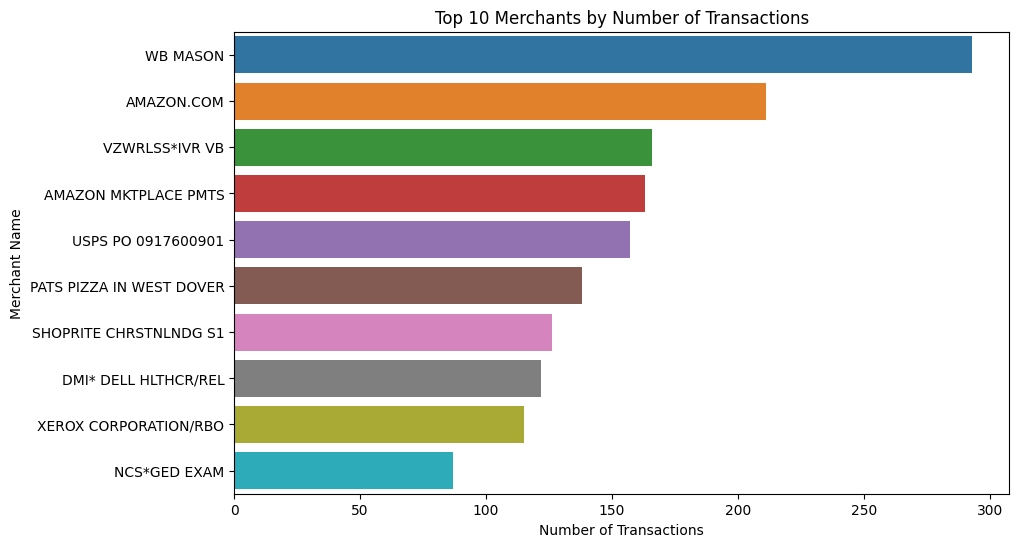

In [10]:
# Count plot for 'MERCHANT' (Top 10)
plt.figure(figsize=(10, 6))
sns.countplot(y=data['MERCHANT'], order=data['MERCHANT'].value_counts().iloc[:10].index)
plt.title('Top 10 Merchants by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Merchant Name')
plt.show()

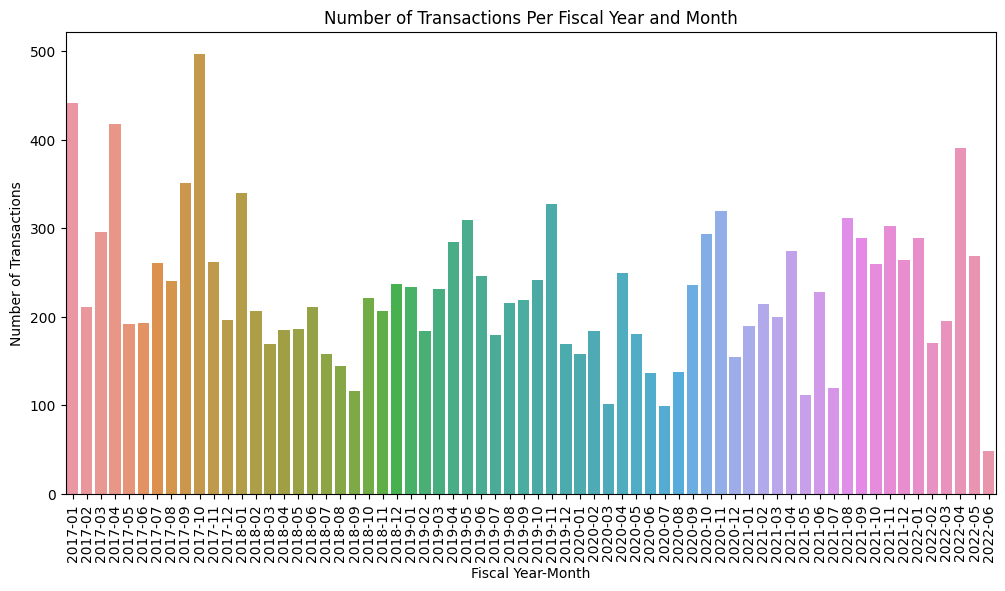

In [11]:
# Transaction counts by fiscal year and month
plt.figure(figsize=(12, 6))
data['YEAR_MONTH'] = data['FISCAL_YR'].astype(str) + '-' + data['FISCAL_MTH'].astype(str).str.zfill(2)
sns.countplot(x='YEAR_MONTH', data=data)
plt.xticks(rotation=90)
plt.title('Number of Transactions Per Fiscal Year and Month')
plt.xlabel('Fiscal Year-Month')
plt.ylabel('Number of Transactions')
plt.show()

There is no real pattern regarding the number of transactions in relation to the fiscal year and month.

In [12]:
for columns in data:
    print(columns, len(data[columns].unique()))

FISCAL_YR 6
FISCAL_MTH 12
DEPT_NAME 1
DIV_NAME 25
MERCHANT 5802
CAT_DESC 208
TRANS_DT 1851
AMT 7851
YEAR_MONTH 66


Merchant and Transaction Date column have too many unique values, which would result in a very sparse dataset which would be computationally expensive for the model to run, hence I will drop these 2 columns.

## Data Cleaning

In [13]:
new_data = data.drop(['MERCHANT', 'TRANS_DT', 'YEAR_MONTH'], axis=1)

Removing the 2 columns with a lot of unique values.

In [14]:
new_data['DIV_NAME'] = new_data['DIV_NAME'].str.lower()
new_data['CAT_DESC'] = new_data['CAT_DESC'].str.lower()

# Task 2: Train, validate and develop a Machine Learning pipeline using PyCaret. (10 marks)

In [15]:
from pycaret.anomaly import *
from pycaret.anomaly import AnomalyExperiment
# exp = AnomalyExperiment()

# Initialize PyCaret setup
exp = setup(new_data, 
        session_id=123,  # Set a seed for reproducibility
        normalize=True,  # Normalize numerical features
        transformation=True,  # Apply power transformation
        log_experiment='mlflow',# Enable experiment logging
        experiment_name='anomaly_detection_experiment')

,Description,Value
0,Session id,123
1,Original data shape,"(15156, 6)"
2,Transformed data shape,"(15156, 144)"
3,Numeric features,3
4,Categorical features,3
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [16]:
type(exp)

pycaret.anomaly.oop.AnomalyExperiment

In [17]:
# train iforest model
iforest = create_model('iforest')
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [18]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [19]:
iforest_anomalies = assign_model(iforest)
iforest_anomalies

,FISCAL_YR,FISCAL_MTH,DEPT_NAME,DIV_NAME,CAT_DESC,AMT,Anomaly,Anomaly_Score
0,2017,1,DEPT OF EDUCATION,department of education,lodging,-5.500000,0,-0.040981
1,2017,1,DEPT OF EDUCATION,department of education,eating places restaurants,18.309999,0,-0.048571
2,2017,1,DEPT OF EDUCATION,department of education,eating places restaurants,21.610001,0,-0.048571
3,2017,1,DEPT OF EDUCATION,department of education,eating places restaurants,22.389999,0,-0.048571
4,2017,1,DEPT OF EDUCATION,department of education,eating places restaurants,5.440000,0,-0.048431
...,...,...,...,...,...,...,...,...
15151,2022,6,DEPT OF EDUCATION,academic support,car rental,52.580002,0,-0.015579
15152,2022,6,DEPT OF EDUCATION,academic support,lodging,14.910000,0,-0.019484
15153,2022,6,DEPT OF EDUCATION,academic support,lodging,111.000000,0,-0.019047
15154,2022,6,DEPT OF EDUCATION,student support,schools educational svc-not elsewhere classified,99.989998,1,0.029821


In [20]:
# predict on test set
iforest_pred = predict_model(iforest, data=new_data)
iforest_pred

,FISCAL_YR,FISCAL_MTH,DEPT_NAME_DEPT OF EDUCATION,DIV_NAME_department of education,DIV_NAME_education block grants,DIV_NAME_special needs programs,DIV_NAME_advisory council,DIV_NAME_transportation,DIV_NAME_driver training,DIV_NAME_other items,...,CAT_DESC_automotive tire stores,CAT_DESC_insurance sales underwriting and premiums,CAT_DESC_schools correspondence,CAT_DESC_record shops,CAT_DESC_cleaning garment and laundry services,CAT_DESC_candy nut confectionery stores,CAT_DESC_bar lounge disco nightclub tavern-alcoholic drinks,AMT,Anomaly,Anomaly_Score
0,-1.110223e-16,-1.652399,0.0,0.862016,-0.269465,-0.356734,-0.09229,-0.067627,-0.045998,-0.131077,...,-0.016248,-0.014071,-0.008123,-0.028149,-0.008123,-0.008123,-0.011488,-0.246585,0,-0.040981
1,-1.110223e-16,-1.652399,0.0,0.862016,-0.269465,-0.356734,-0.09229,-0.067627,-0.045998,-0.131077,...,-0.016248,-0.014071,-0.008123,-0.028149,-0.008123,-0.008123,-0.011488,-0.213448,0,-0.048571
2,-1.110223e-16,-1.652399,0.0,0.862016,-0.269465,-0.356734,-0.09229,-0.067627,-0.045998,-0.131077,...,-0.016248,-0.014071,-0.008123,-0.028149,-0.008123,-0.008123,-0.011488,-0.209732,0,-0.048571
3,-1.110223e-16,-1.652399,0.0,0.862016,-0.269465,-0.356734,-0.09229,-0.067627,-0.045998,-0.131077,...,-0.016248,-0.014071,-0.008123,-0.028149,-0.008123,-0.008123,-0.011488,-0.208863,0,-0.048571
4,-1.110223e-16,-1.652399,0.0,0.862016,-0.269465,-0.356734,-0.09229,-0.067627,-0.045998,-0.131077,...,-0.016248,-0.014071,-0.008123,-0.028149,-0.008123,-0.008123,-0.011488,-0.228865,0,-0.048431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15151,1.110223e-16,0.015835,0.0,-1.160072,-0.269465,-0.356734,-0.09229,-0.067627,-0.045998,-0.131077,...,-0.016248,-0.014071,-0.008123,-0.028149,-0.008123,-0.008123,-0.011488,-0.177068,0,-0.015579
15152,1.110223e-16,0.015835,0.0,-1.160072,-0.269465,-0.356734,-0.09229,-0.067627,-0.045998,-0.131077,...,-0.016248,-0.014071,-0.008123,-0.028149,-0.008123,-0.008123,-0.011488,-0.217354,0,-0.019484
15153,1.110223e-16,0.015835,0.0,-1.160072,-0.269465,-0.356734,-0.09229,-0.067627,-0.045998,-0.131077,...,-0.016248,-0.014071,-0.008123,-0.028149,-0.008123,-0.008123,-0.011488,-0.120789,0,-0.019047
15154,1.110223e-16,0.015835,0.0,-1.160072,-0.269465,-0.356734,-0.09229,-0.067627,-0.045998,-0.131077,...,-0.016248,-0.014071,-0.008123,-0.028149,-0.008123,-0.008123,-0.011488,-0.131063,1,0.029821


## Save model as pkl file

In [21]:
save_model(iforest, 'models/anomaly_detection_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['FISCAL_YR', 'FISCAL_MTH', 'AMT'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['DEPT_NAME', 'DIV_NAME',
                                              'CAT_DESC'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['DEPT_N...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_mode